In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fan_engagement_dataset.csv")
print("Dataset Overview:")
print(df.head())
print(df.info())

Dataset Overview:
   FanID  Age  Gender Location  SocialMediaLikes  SocialMediaShares  \
0      1   56  Female    Rural               222                 47   
1      2   46    Male    Rural               221                193   
2      3   32  Female    Urban                 2                135   
3      4   25    Male    Urban               477                 21   
4      5   38  Female    Rural                 5                  5   

   GameAttendance  MerchandisePurchases  AverageTicketPrice  \
0               0                    13           52.010837   
1               0                     3           30.820890   
2               0                    15           86.042144   
3               0                     0          112.278210   
4               1                    16           57.153280   

   TeamPerformanceScore EngagementLevel  
0                    59            High  
1                    50            High  
2                    91            High  
3       

C:\Users\Leckhasri\Documents\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leckhasri\Documents\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leckhasri\Documents\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leckhasri\Documents\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans

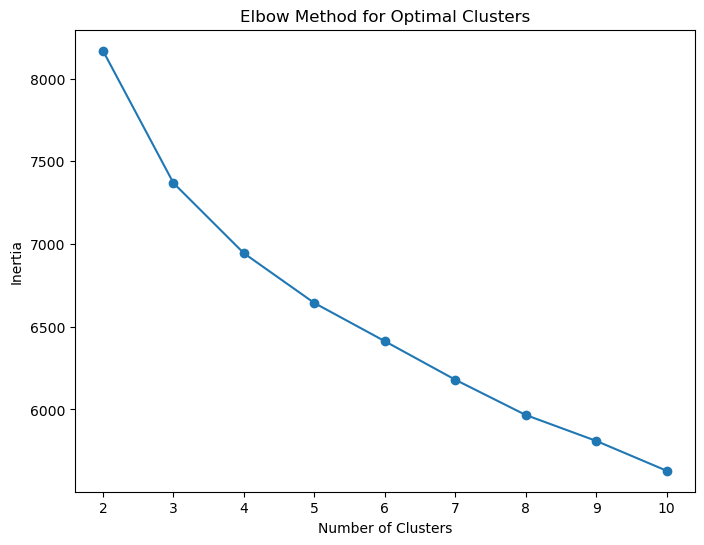

In [4]:

label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  
df["Location"] = label_encoder.fit_transform(df["Location"])  

df_clustering = df.drop(columns=["FanID", "EngagementLevel"])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

inertia = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    # Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()



C:\Users\Leckhasri\Documents\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Leckhasri\Documents\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Silhouette Score for 3 clusters: 0.11


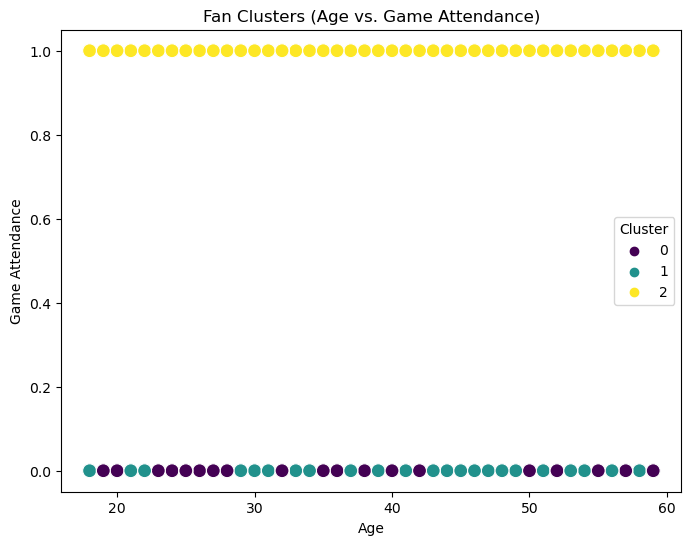

In [5]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

df["Cluster"] = cluster_labels

silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Age"], y=df["GameAttendance"], hue=df["Cluster"], palette="viridis", s=100
)
plt.title("Fan Clusters (Age vs. Game Attendance)")
plt.xlabel("Age")
plt.ylabel("Game Attendance")
plt.legend(title="Cluster")
plt.show()


